<a href="https://colab.research.google.com/github/Giwa-ibrahim/Giwa_Portfolio/blob/main/Predictive_Transformer_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Import the Dataset

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/transformer_data.csv')
data.head()


,Date,Tap Postion,Ph-IVP,Ph-MVS,Ph-MCP,SC-IVP,SC-MCS,SC-MCP,Type of Maintenance
0,10/03/2021,2,383.33,92.50,1.70,381.67,19.13,6.20,GT
1,10/03/2021,3,383.00,90.13,1.74,381.33,19.47,6.37,GT
2,10/03/2021,4,383.00,94.70,1.78,381.00,19.87,6.60,GT
3,10/03/2021,5,382.83,95.40,1.81,380.33,20.23,6.77,GT
4,10/03/2021,6,379.50,96.90,1.86,380.67,20.63,7.10,GT


# Exploratory Data Analysis (EDA)

In [ ]:
data.shape

(105, 9)

In [ ]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 105 non-null    datetime64[ns]
 1   Tap Postion          105 non-null    int64         
 2   Ph-IVP               105 non-null    float64       
 3   Ph-MVS               105 non-null    float64       
 4   Ph-MCP               105 non-null    float64       
 5   SC-IVP               105 non-null    float64       
 6   SC-MCS               105 non-null    float64       
 7   SC-MCP               105 non-null    float64       
 8   Type of Maintenance  105 non-null    object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 7.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit-transform 'Type of Maintenance' column
data['Type of Maintenance'] = encoder.fit_transform(data['Type of Maintenance'])

# Display transformed data
data['Type of Maintenance'].tail()

100    3
101    3
102    3
103    3
104    3
Name: Type of Maintenance, dtype: int64

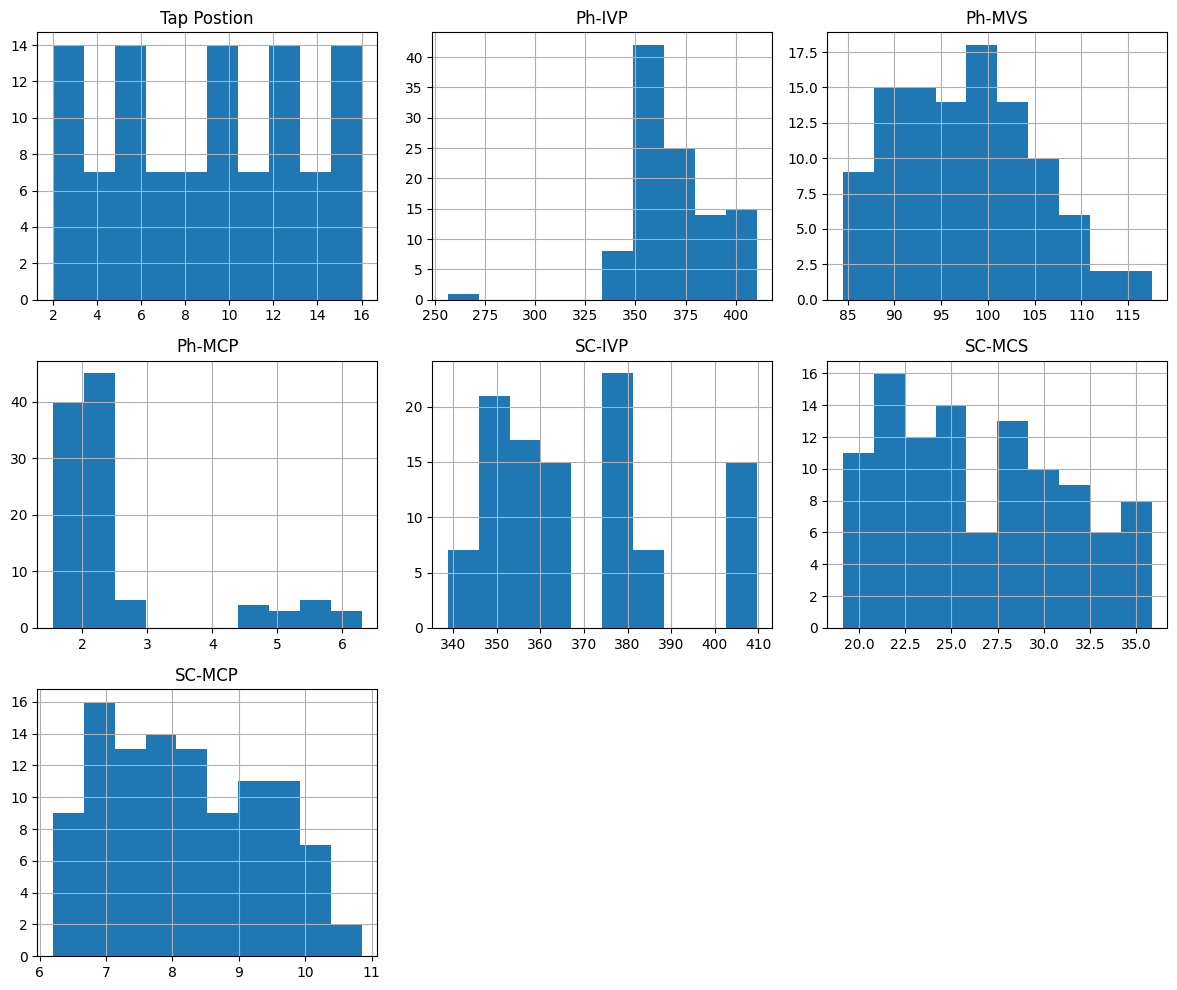

In [ ]:

# Copying the dataset to another variable
data_copy = data.copy()

# Dropping the 'Date' column from the copied dataset
data_needed = data_copy.drop(columns=['Date', 'Type of Maintenance'])

# Plotting histograms for each feature
data_needed.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


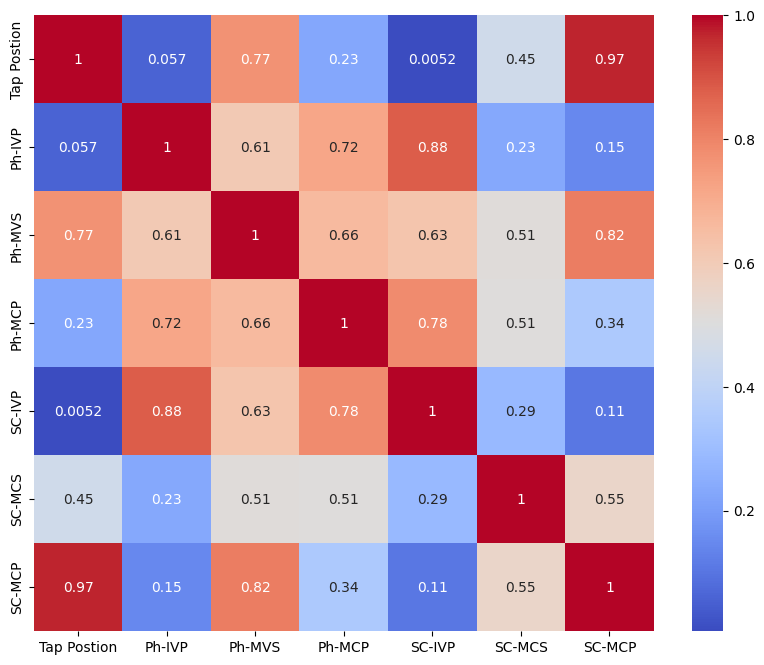

In [ ]:
# Plotting the correlation matrix
corr_matrix = data_needed.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
print(data.columns)

Index(['Date', 'Tap Postion', 'Ph-IVP', 'Ph-MVS', 'Ph-MCP', 'SC-IVP', 'SC-MCS',
       'SC-MCP', 'Type of Maintenance'],
      dtype='object')


# Data Preprocessing


### Feature Engineering

In [ ]:
# 1. Voltage Ratio for Phase and Short Circuit
data['Phase Voltage'] = data['Ph-IVP'] / data['Ph-MVS']
data['SC Voltage'] = data['SC-IVP'] / data['SC-MCS']
data.head()

,Date,Tap Postion,Ph-IVP,Ph-MVS,Ph-MCP,SC-IVP,SC-MCS,SC-MCP,Type of Maintenance,Phase Voltage,SC Voltage
0,2021-03-10,2,383.33,92.50,1.70,381.67,19.13,6.20,1,4.144108,19.951385
1,2021-03-10,3,383.00,90.13,1.74,381.33,19.47,6.37,1,4.249418,19.585516
2,2021-03-10,4,383.00,94.70,1.78,381.00,19.87,6.60,1,4.044351,19.174635
3,2021-03-10,5,382.83,95.40,1.81,380.33,20.23,6.77,1,4.012893,18.800297
4,2021-03-10,6,379.50,96.90,1.86,380.67,20.63,7.10,1,3.916409,18.452254


In [ ]:
print(data.columns)

Index(['Date', 'Tap Postion', 'Ph-IVP', 'Ph-MVS', 'Ph-MCP', 'SC-IVP', 'SC-MCS',
       'SC-MCP', 'Type of Maintenance', 'Phase Voltage', 'SC Voltage'],
      dtype='object')


In [ ]:
# 2. Current-to-Voltage Ratios for Phase and Short Circuit
data['Phase IVP-MCP'] = data['Ph-IVP'] / data['Ph-MCP']
data['Phase MVS-MCP'] = data['Ph-MVS'] / data['Ph-MCP']
data['SC IVP-MCP'] = data['SC-IVP'] / data['SC-MCP']
data['SC IVS-MCS'] = data['SC-IVP'] / data['SC-MCS']
data.head()

,Date,Tap Postion,Ph-IVP,Ph-MVS,Ph-MCP,SC-IVP,SC-MCS,SC-MCP,Type of Maintenance,Phase Voltage,SC Voltage,Phase IVP-MCP,Phase MVS-MCP,SC IVP-MCP,SC IVS-MCS
0,2021-03-10,2,383.33,92.50,1.70,381.67,19.13,6.20,1,4.144108,19.951385,225.488235,54.411765,61.559677,19.951385
1,2021-03-10,3,383.00,90.13,1.74,381.33,19.47,6.37,1,4.249418,19.585516,220.114943,51.798851,59.863422,19.585516
2,2021-03-10,4,383.00,94.70,1.78,381.00,19.87,6.60,1,4.044351,19.174635,215.168539,53.202247,57.727273,19.174635
3,2021-03-10,5,382.83,95.40,1.81,380.33,20.23,6.77,1,4.012893,18.800297,211.508287,52.707182,56.178730,18.800297
4,2021-03-10,6,379.50,96.90,1.86,380.67,20.63,7.10,1,3.916409,18.452254,204.032258,52.096774,53.615493,18.452254


In [ ]:
# 3. Power Metrics
data['Ph-AppPower'] = data['Ph-IVP'] * data['Ph-MCP']
data['SC-AppPower'] = data['SC-IVP'] * data['SC-MCP']
data.head()

,Date,Tap Postion,Ph-IVP,Ph-MVS,Ph-MCP,SC-IVP,SC-MCS,SC-MCP,Type of Maintenance,Phase Voltage,SC Voltage,Phase IVP-MCP,Phase MVS-MCP,SC IVP-MCP,SC IVS-MCS,Ph-AppPower,SC-AppPower
0,2021-03-10,2,383.33,92.50,1.70,381.67,19.13,6.20,1,4.144108,19.951385,225.488235,54.411765,61.559677,19.951385,651.6610,2366.3540
1,2021-03-10,3,383.00,90.13,1.74,381.33,19.47,6.37,1,4.249418,19.585516,220.114943,51.798851,59.863422,19.585516,666.4200,2429.0721
2,2021-03-10,4,383.00,94.70,1.78,381.00,19.87,6.60,1,4.044351,19.174635,215.168539,53.202247,57.727273,19.174635,681.7400,2514.6000
3,2021-03-10,5,382.83,95.40,1.81,380.33,20.23,6.77,1,4.012893,18.800297,211.508287,52.707182,56.178730,18.800297,692.9223,2574.8341
4,2021-03-10,6,379.50,96.90,1.86,380.67,20.63,7.10,1,3.916409,18.452254,204.032258,52.096774,53.615493,18.452254,705.8700,2702.7570


In [ ]:
data.columns

Index(['Date', 'Tap Postion', 'Ph-IVP', 'Ph-MVS', 'Ph-MCP', 'SC-IVP', 'SC-MCS',
       'SC-MCP', 'Type of Maintenance', 'Phase Voltage', 'SC Voltage',
       'Phase IVP-MCP', 'Phase MVS-MCP', 'SC IVP-MCP', 'SC IVS-MCS',
       'Ph-AppPower', 'SC-AppPower'],
      dtype='object')

In [ ]:
data.shape

(105, 17)

## Extract the Target Variable

### Let's define the threshold for the maintenance

In [ ]:
mean_ph= data['Ph-AppPower'].mean()
std_ph= data['Ph-AppPower'].std()
mean_sc = data['SC-AppPower'].mean()
std_sc = data['SC-AppPower'].std()
print("Mean Ph-AppPower:", mean_ph)
print("Standard Deviation Ph-AppPower:", std_ph)
print("Mean SC-AppPower:", mean_sc)
print("Standard Deviation SC-AppPower:", std_sc)

Mean Ph-AppPower: 960.5916494214991
Standard Deviation Ph-AppPower: 515.30058196312
Mean SC-AppPower: 3018.195689627931
Standard Deviation SC-AppPower: 481.62596478959495


In [ ]:
# Define threshold (mean - standard deviation)
ph_upper_threshold = mean_ph + std_ph
ph_lower_threshold = mean_ph - std_ph
sc_upper_threshold = mean_sc + std_sc
sc_lower_threshold = mean_sc - std_sc
print("Phase Upper Threshold", ph_upper_threshold)
print("Phase Lower Threshold", ph_lower_threshold)
print("SC Upper Threshold", sc_upper_threshold)
print("SC Lower Threshold", sc_lower_threshold)

Phase Upper Threshold 1475.8922313846192
Phase Lower Threshold 445.2910674583792
SC Upper Threshold 3499.821654417526
SC Lower Threshold 2536.5697248383362


In [ ]:
data.head()

,Date,Tap Postion,Ph-IVP,Ph-MVS,Ph-MCP,SC-IVP,SC-MCS,SC-MCP,Type of Maintenance,Phase Voltage,SC Voltage,Phase IVP-MCP,Phase MVS-MCP,SC IVP-MCP,SC IVS-MCS,Ph-AppPower,SC-AppPower
0,2021-03-10,2,383.33,92.50,1.70,381.67,19.13,6.20,1,4.144108,19.951385,225.488235,54.411765,61.559677,19.951385,651.6610,2366.3540
1,2021-03-10,3,383.00,90.13,1.74,381.33,19.47,6.37,1,4.249418,19.585516,220.114943,51.798851,59.863422,19.585516,666.4200,2429.0721
2,2021-03-10,4,383.00,94.70,1.78,381.00,19.87,6.60,1,4.044351,19.174635,215.168539,53.202247,57.727273,19.174635,681.7400,2514.6000
3,2021-03-10,5,382.83,95.40,1.81,380.33,20.23,6.77,1,4.012893,18.800297,211.508287,52.707182,56.178730,18.800297,692.9223,2574.8341
4,2021-03-10,6,379.50,96.90,1.86,380.67,20.63,7.10,1,3.916409,18.452254,204.032258,52.096774,53.615493,18.452254,705.8700,2702.7570


In [ ]:
# Function to determine 'Target' value
def determine_target(row):
    if (row['Ph-AppPower'] < ph_lower_threshold or row['Ph-AppPower'] > ph_upper_threshold) and \
       (row['SC-AppPower'] < sc_lower_threshold or row['SC-AppPower'] > sc_upper_threshold):
        return 1  # Failure
    else:
        return 0  # No failure

In [ ]:
# Apply function to create 'Target' column
data['Target'] = data.apply(determine_target, axis=1)
data.head()

,Date,Tap Postion,Ph-IVP,Ph-MVS,Ph-MCP,SC-IVP,SC-MCS,SC-MCP,Type of Maintenance,Phase Voltage,SC Voltage,Phase IVP-MCP,Phase MVS-MCP,SC IVP-MCP,SC IVS-MCS,Ph-AppPower,SC-AppPower,Target
0,2021-03-10,2,383.33,92.50,1.70,381.67,19.13,6.20,1,4.144108,19.951385,225.488235,54.411765,61.559677,19.951385,651.6610,2366.3540,0
1,2021-03-10,3,383.00,90.13,1.74,381.33,19.47,6.37,1,4.249418,19.585516,220.114943,51.798851,59.863422,19.585516,666.4200,2429.0721,0
2,2021-03-10,4,383.00,94.70,1.78,381.00,19.87,6.60,1,4.044351,19.174635,215.168539,53.202247,57.727273,19.174635,681.7400,2514.6000,0
3,2021-03-10,5,382.83,95.40,1.81,380.33,20.23,6.77,1,4.012893,18.800297,211.508287,52.707182,56.178730,18.800297,692.9223,2574.8341,0
4,2021-03-10,6,379.50,96.90,1.86,380.67,20.63,7.10,1,3.916409,18.452254,204.032258,52.096774,53.615493,18.452254,705.8700,2702.7570,0


In [ ]:
data['Target'].head(50)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    1
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
Name: Target, dtype: int64

### Exploratory Analysis on the Date and Target Features

In [ ]:
data['Target'].value_counts()

Target
0    97
1     8
Name: count, dtype: int64

In [ ]:
data.columns

Index(['Date', 'Tap Postion', 'Ph-IVP', 'Ph-MVS', 'Ph-MCP', 'SC-IVP', 'SC-MCS',
       'SC-MCP', 'Type of Maintenance', 'Phase Voltage', 'SC Voltage',
       'Phase IVP-MCP', 'Phase MVS-MCP', 'SC IVP-MCP', 'SC IVS-MCS',
       'Ph-AppPower', 'SC-AppPower', 'Target'],
      dtype='object')

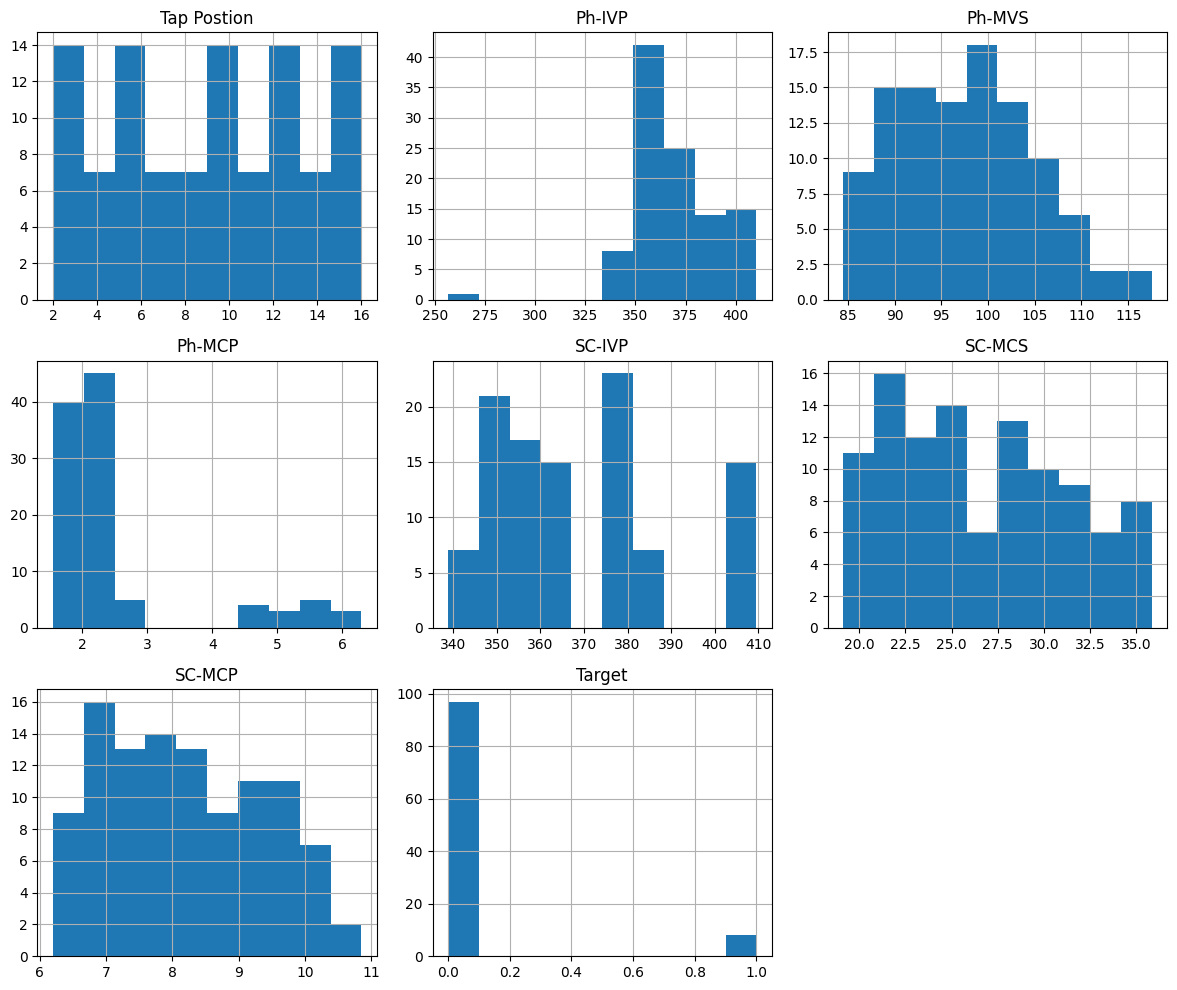

In [ ]:
# Copying the dataset to another variable
data_copy = data.copy()

# Dropping the 'Date' column from the copied dataset
data_needed = data_copy.drop(columns=['Date', 'Type of Maintenance', 'Phase Voltage', 'SC Voltage',
       'Phase IVP-MCP', 'Phase MVS-MCP', 'SC IVP-MCP', 'SC IVS-MCS',
       'Ph-AppPower', 'SC-AppPower'])
# Plotting histograms for each feature
data_needed.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

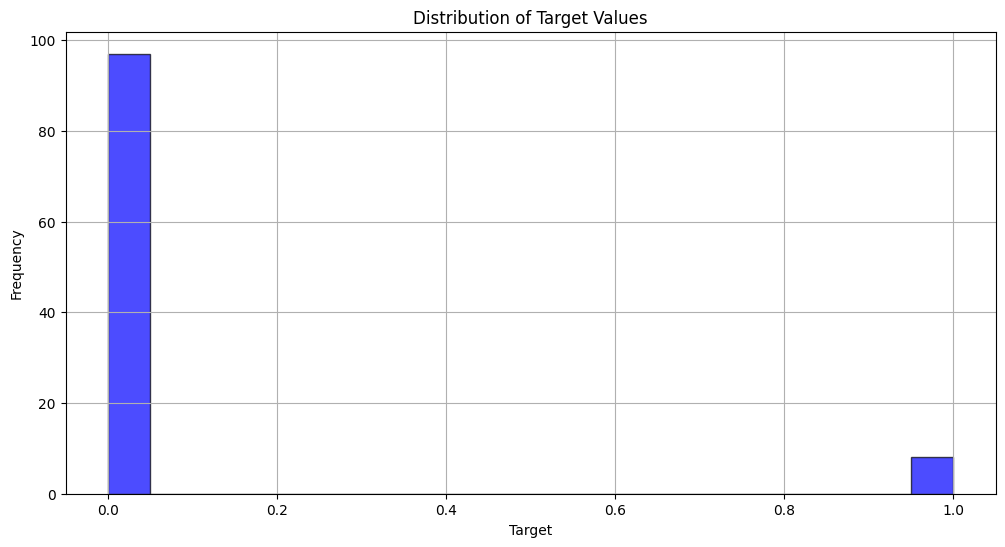

In [ ]:
plt.figure(figsize=(12, 6))
plt.hist(data['Target'], bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Target Values')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

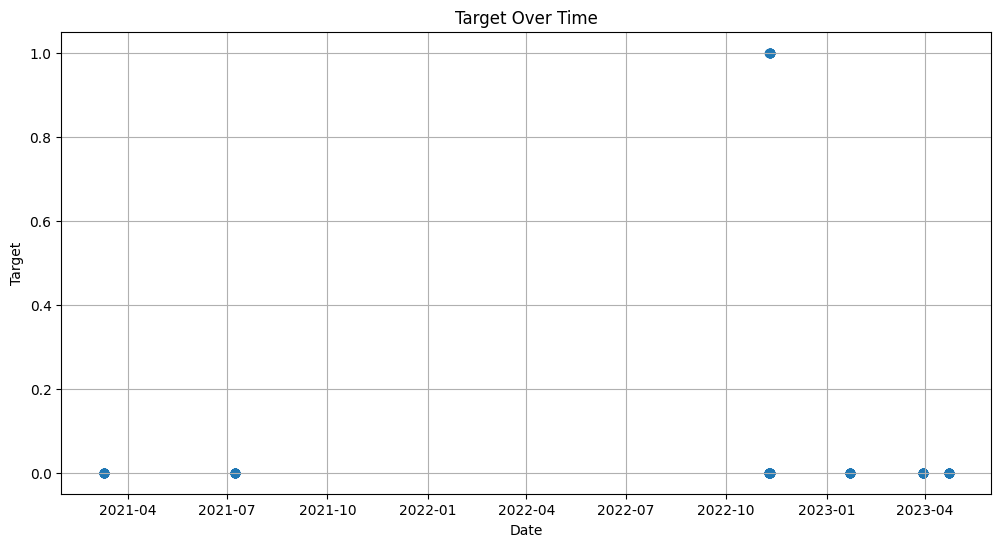

In [ ]:
# Line Plot for Date and Target
plt.figure(figsize=(12, 6))
plt.scatter(data['Date'], data['Target'], marker='o')
plt.title('Target Over Time')
plt.xlabel('Date')
plt.ylabel('Target')
#plt.legend()
plt.grid(True)
plt.show()


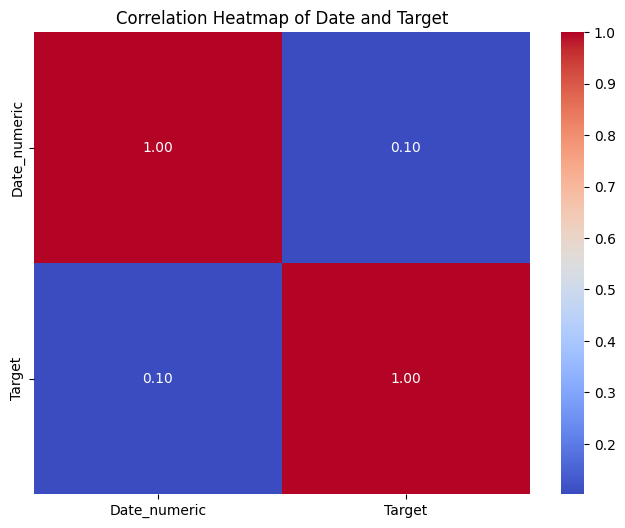

In [ ]:
# Copy the data to another variable
data_copy = data.copy()
# Convert 'Date' to numerical format for correlation analysis
data_copy['Date_numeric'] = data_copy['Date'].apply(lambda x: x.toordinal())

# Select the 'Date_numeric' and 'Target' columns for correlation heatmap
correlation_data = data_copy[['Date_numeric', 'Target']]

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Date and Target')
plt.show()

In [ ]:
print(data)

          Date  Tap Postion      Ph-IVP      Ph-MVS    Ph-MCP      SC-IVP  \
0   2021-03-10            2  383.330000   92.500000  1.700000  381.670000   
1   2021-03-10            3  383.000000   90.130000  1.740000  381.330000   
2   2021-03-10            4  383.000000   94.700000  1.780000  381.000000   
3   2021-03-10            5  382.830000   95.400000  1.810000  380.330000   
4   2021-03-10            6  379.500000   96.900000  1.860000  380.670000   
..         ...          ...         ...         ...       ...         ...   
100 2022-11-10           12  407.833333  108.166667  5.680000  406.500000   
101 2022-11-10           13  407.466667  111.633333  5.726667  405.866667   
102 2022-11-10           14  408.533333  113.666667  5.940000  404.533333   
103 2022-11-10           15  408.966667  115.700000  6.093333  404.333333   
104 2022-11-10           16  410.066667  117.500000  6.293333  409.566667   

        SC-MCS     SC-MCP  Type of Maintenance  Phase Voltage  SC Voltage  

In [ ]:
# Count the number of 1s and 0s
counts = data['Target'].value_counts()

print(counts)

Target
0    97
1     8
Name: count, dtype: int64


## Feature Selection

 In this section, we employed several methods to determine the best features for predicting transformer maintenance

### Step 1: Correlation Matrix

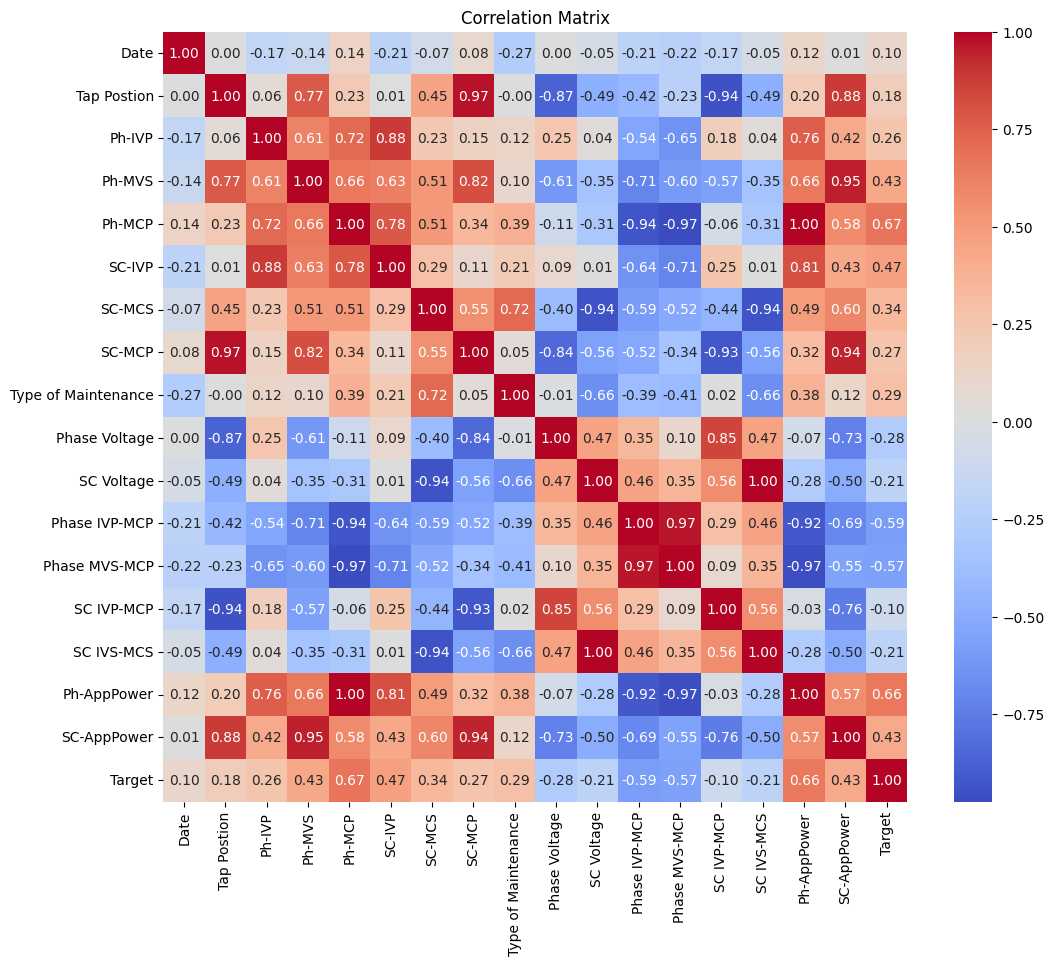

In [ ]:
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


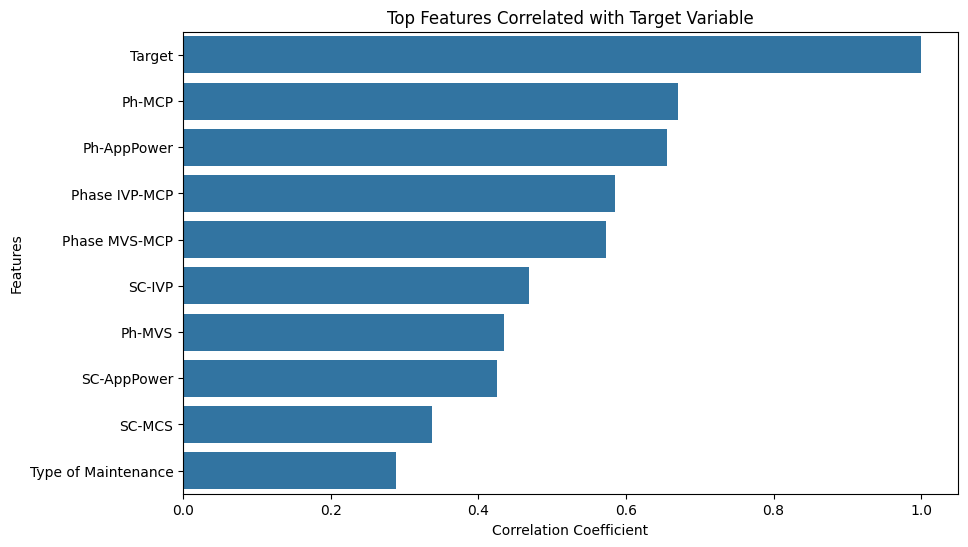

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Extract the correlation of each feature with the target variable 'SC_Maintenance'
target_correlation = correlation_matrix['Target']

# Select the top features based on their absolute correlation with the target
top_features = target_correlation.abs().sort_values(ascending=False).head(10)

# Plot the top features correlation with the target
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top Features Correlated with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

### Step 2: Drop and Rename some columns

In [ ]:
data.columns

Index(['Date', 'Tap Postion', 'Ph-IVP', 'Ph-MVS', 'Ph-MCP', 'SC-IVP', 'SC-MCS',
       'SC-MCP', 'Type of Maintenance', 'Phase Voltage', 'SC Voltage',
       'Phase IVP-MCP', 'Phase MVS-MCP', 'SC IVP-MCP', 'SC IVS-MCS',
       'Ph-AppPower', 'SC-AppPower', 'Target'],
      dtype='object')

In [ ]:
# Drop unwanted columns
copied_data = data.copy()
columns_to_drop = ['Date', 'SC Voltage']  # Replace with the actual column names you want to drop
copied_data = copied_data.drop(columns=columns_to_drop) # Will drop Ph-IVP, SC-MCS, Phase MVS-MCP, SC IVS-MCS later after my model result
copied_data.head()

,Tap Postion,Ph-IVP,Ph-MVS,Ph-MCP,SC-IVP,SC-MCS,SC-MCP,Type of Maintenance,Phase Voltage,Phase IVP-MCP,Phase MVS-MCP,SC IVP-MCP,SC IVS-MCS,Ph-AppPower,SC-AppPower,Target
0,2,383.33,92.50,1.70,381.67,19.13,6.20,1,4.144108,225.488235,54.411765,61.559677,19.951385,651.6610,2366.3540,0
1,3,383.00,90.13,1.74,381.33,19.47,6.37,1,4.249418,220.114943,51.798851,59.863422,19.585516,666.4200,2429.0721,0
2,4,383.00,94.70,1.78,381.00,19.87,6.60,1,4.044351,215.168539,53.202247,57.727273,19.174635,681.7400,2514.6000,0
3,5,382.83,95.40,1.81,380.33,20.23,6.77,1,4.012893,211.508287,52.707182,56.178730,18.800297,692.9223,2574.8341,0
4,6,379.50,96.90,1.86,380.67,20.63,7.10,1,3.916409,204.032258,52.096774,53.615493,18.452254,705.8700,2702.7570,0


In [ ]:
copied_data.shape

(105, 16)

### Split the features (X) from Target (Y)

In [ ]:
# Select all columns except the last one for X (features)
X = copied_data.iloc[:, :-1]

# Select the last column for Y (target)
Y = copied_data.iloc[:, -1]

# Display the first few rows to confirm
print("Features (X):")
print(X.head())

Features (X):
   Tap Postion  Ph-IVP  Ph-MVS  Ph-MCP  SC-IVP  SC-MCS  SC-MCP  \
0            2  383.33   92.50    1.70  381.67   19.13    6.20   
1            3  383.00   90.13    1.74  381.33   19.47    6.37   
2            4  383.00   94.70    1.78  381.00   19.87    6.60   
3            5  382.83   95.40    1.81  380.33   20.23    6.77   
4            6  379.50   96.90    1.86  380.67   20.63    7.10   

   Type of Maintenance  Phase Voltage  Phase IVP-MCP  Phase MVS-MCP  \
0                    1       4.144108     225.488235      54.411765   
1                    1       4.249418     220.114943      51.798851   
2                    1       4.044351     215.168539      53.202247   
3                    1       4.012893     211.508287      52.707182   
4                    1       3.916409     204.032258      52.096774   

   SC IVP-MCP  SC IVS-MCS  Ph-AppPower  SC-AppPower  
0   61.559677   19.951385     651.6610    2366.3540  
1   59.863422   19.585516     666.4200    2429.0721  


In [ ]:
print(Y.head())

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64


# Model Development with Random Forest Classifier

In [ ]:
# Step 1: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Step 3: Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
model = rf_classifier.fit(X_train_scaled, y_train)

In [ ]:
# Step 4: Make predictions
y_pred = model.predict(X_test_scaled)

In [ ]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.96875
Confusion Matrix:
[[29  0]
 [ 1  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.98      0.83      0.89        32
weighted avg       0.97      0.97      0.97        32



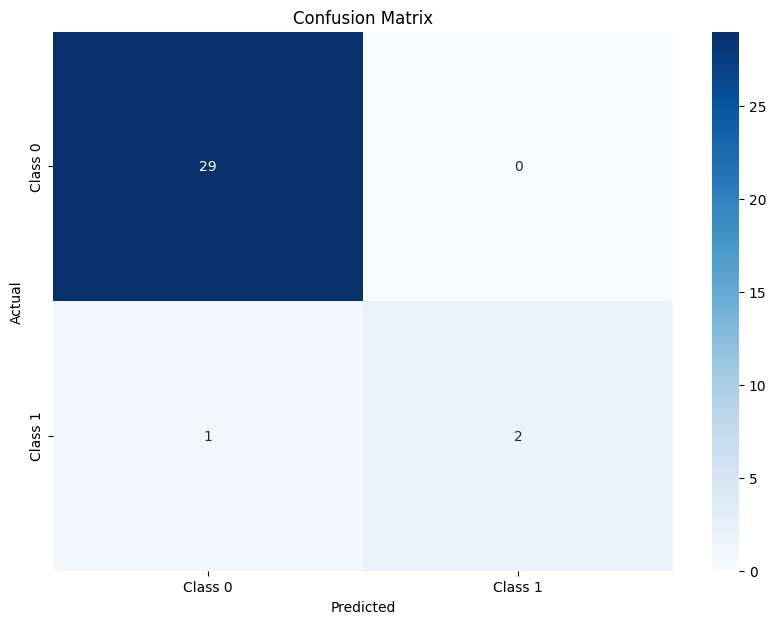

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Model Training with ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Step 1: Define the ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Step 2: Compile and train the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Step 3: Make predictions and evaluate the model
y_pred = (ann_model.predict(X_test_scaled) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Epoch 1/10
6/6 [==============================] - 3s 133ms/step - loss: 0.6901 - accuracy: 0.6724 - val_loss: 0.6388 - val_accuracy: 0.7333
Epoch 2/10
6/6 [==============================] - 0s 33ms/step - loss: 0.5271 - accuracy: 0.8621 - val_loss: 0.5170 - val_accuracy: 0.8667
Epoch 3/10
6/6 [==============================] - 0s 44ms/step - loss: 0.4206 - accuracy: 0.9310 - val_loss: 0.4221 - val_accuracy: 0.8667
Epoch 4/10
6/6 [==============================] - 0s 26ms/step - loss: 0.3395 - accuracy: 0.9655 - val_loss: 0.3502 - val_accuracy: 1.0000
Epoch 5/10
6/6 [==============================] - 0s 23ms/step - loss: 0.2758 - accuracy: 0.9655 - val_loss: 0.2966 - val_accuracy: 1.0000
Epoch 6/10
6/6 [==============================] - 0s 26ms/step - loss: 0.2285 - accuracy: 0.9828 - val_loss: 0.2504 - val_accuracy: 1.0000
Epoch 7/10
6/6 [==============================] - 0s 27ms/step - loss: 0.1893 - accuracy: 0.9655 - val_loss: 0.2149 - val_accuracy: 1.0000
Epoch 8/10
6/6 [==========

## Model Training with XGBoost

In [ ]:
import xgboost as xgb

# Step 2: Train the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
model_xgb = xgb_classifier.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_xgb = model_xgb.predict(X_test)

# Step 4: Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Print the evaluation metrics
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Confusion Matrix:")
print(conf_matrix_xgb)
print("XGBoost Classification Report:")
print(class_report_xgb)


XGBoost Accuracy: 0.96875
XGBoost Confusion Matrix:
[[29  0]
 [ 1  2]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.98      0.83      0.89        32
weighted avg       0.97      0.97      0.97        32



## Model Training with LightGBM

In [ ]:
import lightgbm as lgb

# Step 2: Train the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(n_estimators=100, random_state=42)
model_lgb = lgb_classifier.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_lgb = model_lgb.predict(X_test)

# Step 4: Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
class_report_lgb = classification_report(y_test, y_pred_lgb)

# Print the evaluation metrics
print(f"LightGBM Accuracy: {accuracy_lgb}")
print("LightGBM Confusion Matrix:")
print(conf_matrix_lgb)
print("LightGBM Classification Report:")
print(class_report_lgb)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 5, number of negative: 68
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 73, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.068493 -> initscore=-2.610070
[LightGBM] [Info] Start training from score -2.610070
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

## Model Training with AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Step 2: Train the AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
model_ada = ada_classifier.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_ada = model_ada.predict(X_test)

# Step 4: Evaluate the model
accuracy_ada = accuracy_score(y_test, y_pred_ada)
conf_matrix_ada = confusion_matrix(y_test, y_pred_ada)
class_report_ada = classification_report(y_test, y_pred_ada)

# Print the evaluation metrics
print(f"AdaBoost Accuracy: {accuracy_ada}")
print("AdaBoost Confusion Matrix:")
print(conf_matrix_ada)
print("AdaBoost Classification Report:")
print(class_report_ada)


AdaBoost Accuracy: 0.96875
AdaBoost Confusion Matrix:
[[29  0]
 [ 1  2]]
AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.98      0.83      0.89        32
weighted avg       0.97      0.97      0.97        32



# Check feature importance for the RF Model

In [ ]:
feature_importance = model.feature_importances_
features = X.columns

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

In [ ]:
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

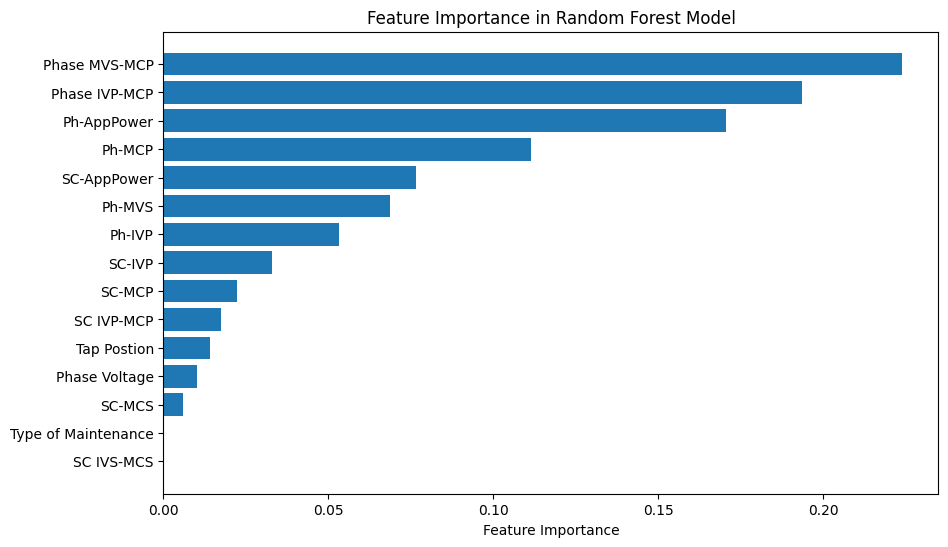

                Feature  Importance
10        Phase MVS-MCP    0.223711
9         Phase IVP-MCP    0.193456
13          Ph-AppPower    0.170584
3                Ph-MCP    0.111303
14          SC-AppPower    0.076543
2                Ph-MVS    0.068768
1                Ph-IVP    0.053078
4                SC-IVP    0.032752
6                SC-MCP    0.022168
11           SC IVP-MCP    0.017564
0           Tap Postion    0.014170
8         Phase Voltage    0.010061
5                SC-MCS    0.005842
7   Type of Maintenance    0.000000
12           SC IVS-MCS    0.000000


In [ ]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()

# Print the sorted DataFrame
print(importance_df)

From our previous assumption during feature selection, it was necessary to drop these columns: Ph-IVP, SC-MCS, Phase MVS-MCP, SC IVS-MCS.
However, from the model feature importance, we shall drop the last 8 columns


In [ ]:
X.columns

Index(['Tap Postion', 'Ph-IVP', 'Ph-MVS', 'Ph-MCP', 'SC-IVP', 'SC-MCS',
       'SC-MCP', 'Type of Maintenance', 'Phase Voltage', 'Phase IVP-MCP',
       'Phase MVS-MCP', 'SC IVP-MCP', 'SC IVS-MCS', 'Ph-AppPower',
       'SC-AppPower'],
      dtype='object')

In [ ]:
# Copy data to a new variable named 'selected_data'
selected_features = X.copy()

# Define the columns to drop
columns_to_drop = ['Type of Maintenance', 'SC IVS-MCS', 'SC-MCS', 'Phase Voltage']

# Drop the specified columns from 'selected_data'
selected_features = selected_features.drop(columns=columns_to_drop)
# Display the first few rows of the modified dataset
selected_features.head()


,Tap Postion,Ph-IVP,Ph-MVS,Ph-MCP,SC-IVP,SC-MCP,Phase IVP-MCP,Phase MVS-MCP,SC IVP-MCP,Ph-AppPower,SC-AppPower
0,2,383.33,92.50,1.70,381.67,6.20,225.488235,54.411765,61.559677,651.6610,2366.3540
1,3,383.00,90.13,1.74,381.33,6.37,220.114943,51.798851,59.863422,666.4200,2429.0721
2,4,383.00,94.70,1.78,381.00,6.60,215.168539,53.202247,57.727273,681.7400,2514.6000
3,5,382.83,95.40,1.81,380.33,6.77,211.508287,52.707182,56.178730,692.9223,2574.8341
4,6,379.50,96.90,1.86,380.67,7.10,204.032258,52.096774,53.615493,705.8700,2702.7570


## Retrain the selected Data with the RF model

In [ ]:
print(selected_features.columns)

Index(['Tap Postion', 'Ph-IVP', 'Ph-MVS', 'Ph-MCP', 'SC-IVP', 'SC-MCP',
       'Phase IVP-MCP', 'Phase MVS-MCP', 'SC IVP-MCP', 'Ph-AppPower',
       'SC-AppPower'],
      dtype='object')


In [ ]:
print(selected_features.shape)


(105, 11)


In [ ]:
selected_features.describe()

,Tap Postion,Ph-IVP,Ph-MVS,Ph-MCP,SC-IVP,SC-MCP,Phase IVP-MCP,Phase MVS-MCP,SC IVP-MCP,Ph-AppPower,SC-AppPower
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,9.000000,369.367968,97.556825,2.550190,368.151016,8.191714,162.205433,42.657959,45.837504,960.591649,3018.195690
std,4.341216,22.165023,7.322514,1.184440,19.405571,1.183810,40.348318,9.823692,6.753903,515.300582,481.625965
min,2.000000,256.500000,84.500000,1.550000,338.770000,6.200000,65.158898,18.670551,33.641509,438.615000,2162.961000
25%,5.000000,354.000000,91.800000,1.910000,350.730000,7.180000,151.121849,42.585903,40.090600,698.874500,2629.357500
50%,9.000000,364.330000,97.670000,2.150000,363.000000,8.070000,169.341346,45.244131,45.536649,777.478000,2978.457300
75%,13.000000,381.000000,102.200000,2.380000,380.330000,9.170000,188.965000,48.289617,51.370703,874.024300,3359.246000
max,16.000000,410.400000,117.500000,6.293333,409.600000,10.850000,230.535484,55.270968,61.559677,2580.686222,4232.188888


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_features, Y, test_size=0.3, random_state=42)

# Retrain the model on the reduced feature set
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
retrained_model= rf_classifier.fit(X_train, y_train)

# Evaluate the retrained model
y_pred = retrained_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set after retraining: {accuracy:.2f}")


Accuracy on the test set after retraining: 0.97


## Hyperparameter Tuning with Random Search

In [ ]:
# Define the parameter grid for Random Search
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=15)], # Number of trees in the forest
    'max_features': ['auto', 'sqrt'], # Number of features to consider at every split
    'max_depth': [int(x) for x in np.linspace(10, 120, num=11)], # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at each leaf node
    'bootstrap': [True, False] # Method of selecting samples for training each tree
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize the Random Search with cross-validation
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
random_search.fit(X_train, y_train)

# Best parameters from random search
best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found: {'n_estimators': 135, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [ ]:
# Retrain the model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_model= best_rf_classifier.fit(X_train, y_train)

# Evaluate the retrained model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy on the test set after hyperparameter tuning: {accuracy:.2f}")


# Print the evaluation metrics
#print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy on the test set after hyperparameter tuning: 0.97
Confusion Matrix:
[[29  0]
 [ 1  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.67      0.80         3

    accuracy                           0.97        32
   macro avg       0.98      0.83      0.89        32
weighted avg       0.97      0.97      0.97        32



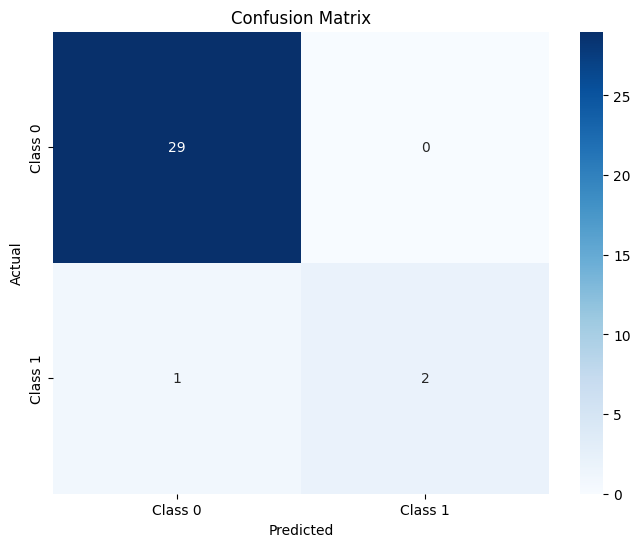

In [ ]:
#Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

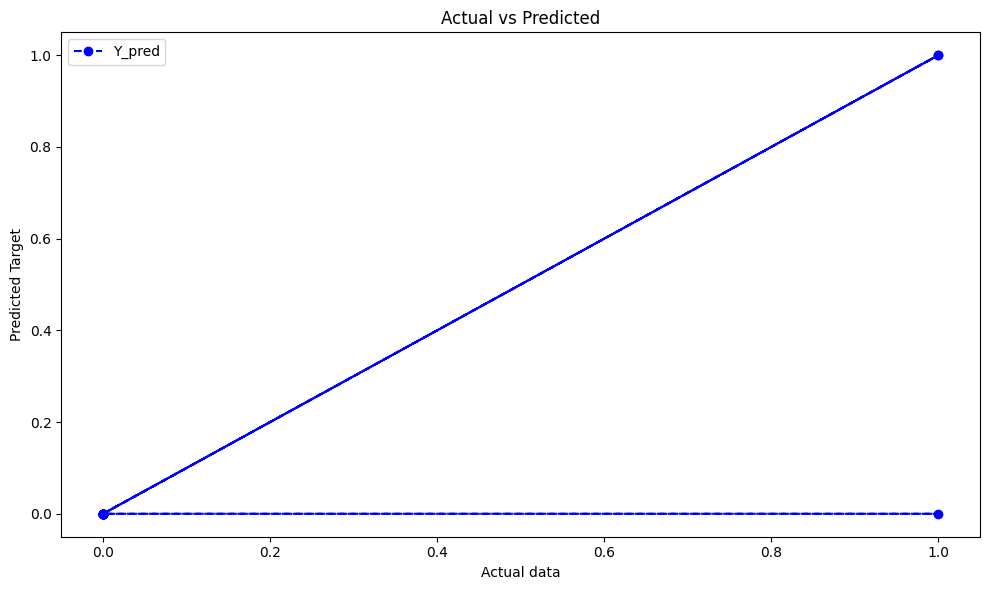

In [ ]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, marker='o', linestyle='--', color='b', label='Y_pred')
plt.xlabel('Actual data')
plt.ylabel('Predicted Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.tight_layout()
plt.show()

# Forecast Transformer Maintenance with Date

In [ ]:
# Create a DataFrame for future dates with average values for other features
from datetime import datetime, timedelta

# Assuming you have a starting date for predictions
start_date = datetime.now()
# Generate future dates
future_dates = pd.date_range(start=start_date, periods=32, freq='D')

# Format the dates to include only day, month, and year
formatted_dates = future_dates.strftime('%d-%m-%Y')

# Create a DataFrame with the formatted dates
future_dates = pd.DataFrame({'Date': formatted_dates})

# Display the DataFrame
print(future_dates)


          Date
0   05-07-2024
1   06-07-2024
2   07-07-2024
3   08-07-2024
4   09-07-2024
5   10-07-2024
6   11-07-2024
7   12-07-2024
8   13-07-2024
9   14-07-2024
10  15-07-2024
11  16-07-2024
12  17-07-2024
13  18-07-2024
14  19-07-2024
15  20-07-2024
16  21-07-2024
17  22-07-2024
18  23-07-2024
19  24-07-2024
20  25-07-2024
21  26-07-2024
22  27-07-2024
23  28-07-2024
24  29-07-2024
25  30-07-2024
26  31-07-2024
27  01-08-2024
28  02-08-2024
29  03-08-2024
30  04-08-2024
31  05-08-2024


In [ ]:
selected_features.columns

Index(['Tap Postion', 'Ph-IVP', 'Ph-MVS', 'Ph-MCP', 'SC-IVP', 'SC-MCP',
       'Phase IVP-MCP', 'Phase MVS-MCP', 'SC IVP-MCP', 'Ph-AppPower',
       'SC-AppPower'],
      dtype='object')

In [ ]:
future_data = pd.DataFrame(index=future_dates)

In [ ]:
# Predict maintenance using the trained model
predicted_target = best_model.predict(X_test)

In [ ]:
predicted_target.shape

(32,)

In [ ]:
# Create a DataFrame to store the forecasted results
forecast_results = pd.DataFrame({
    'Date': future_dates['Date'],
    'Target_Forecast': predicted_target
})

In [ ]:
# Display the forecasted results
print(forecast_results)

          Date  Target_Forecast
0   05-07-2024                0
1   06-07-2024                0
2   07-07-2024                0
3   08-07-2024                0
4   09-07-2024                0
5   10-07-2024                0
6   11-07-2024                1
7   12-07-2024                0
8   13-07-2024                0
9   14-07-2024                0
10  15-07-2024                0
11  16-07-2024                0
12  17-07-2024                0
13  18-07-2024                0
14  19-07-2024                0
15  20-07-2024                0
16  21-07-2024                0
17  22-07-2024                0
18  23-07-2024                0
19  24-07-2024                0
20  25-07-2024                1
21  26-07-2024                0
22  27-07-2024                0
23  28-07-2024                0
24  29-07-2024                0
25  30-07-2024                0
26  31-07-2024                0
27  01-08-2024                0
28  02-08-2024                0
29  03-08-2024                0
30  04-0

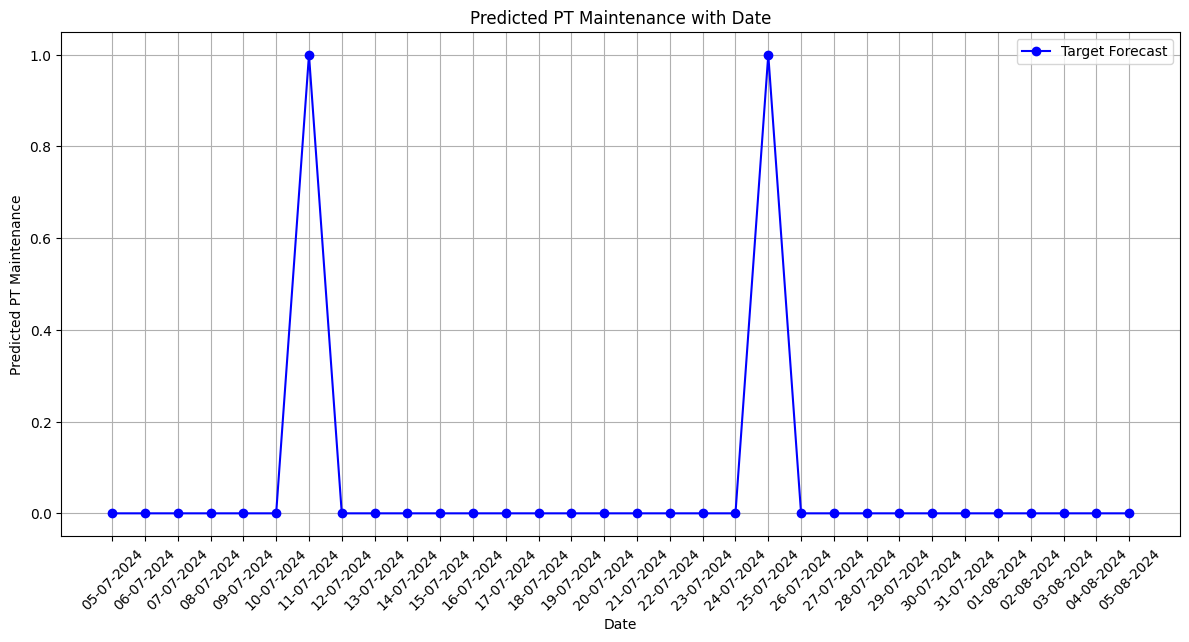

In [ ]:
# Plotting Date vs predicted_target_forecast
plt.figure(figsize=(12, 6))
# Extract the 'Date' column as a list for plotting
plt.plot(future_dates['Date'].tolist(), predicted_target, marker='o', linestyle='-', color='b', label='Target Forecast')
plt.xlabel('Date')
plt.ylabel('Predicted PT Maintenance')
plt.title('Predicted PT Maintenance with Date')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Optionally, save the forecast_results to a CSV file or use it further in your analysis
forecast_results.to_csv('forecast_results.csv', index=False)